# Loading the data of churn modelling of excel format in my workspace.

In [1]:
import pandas as pd

file_path = r'P3- Churn-Modelling Data.xlsx'
df = pd.read_excel(file_path)
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,churned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


## Cutomer Demographics

### Distribution of customers across different age groups.

In [2]:
age_groups = [0, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110]
age_labels = ['0-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89', '90-99', '100-109']

df['AgeGroup'] = pd.cut(df['Age'], bins=age_groups, labels=age_labels, right=False)
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,churned,AgeGroup
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,40-49
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,40-49
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,40-49
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,30-39
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,40-49
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0,30-39
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,30-39
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1,30-39
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,40-49


### Analysing the gender distribution of cutomers

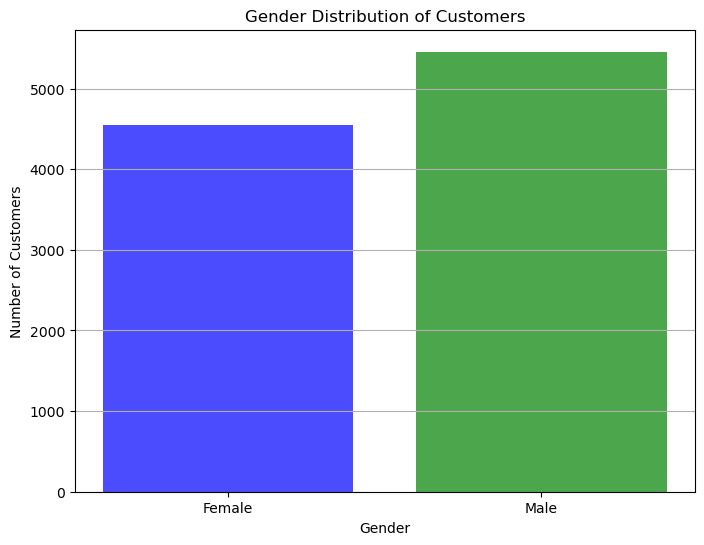

In [3]:
import matplotlib.pyplot as plt
no_female = 0
no_male = 0
for index, row in df.iterrows():
    if (row['Gender'] == 'Female'):
        no_female += 1
    else:
        no_male += 1

plt.figure(figsize=(8, 6))
plt.bar(['Female', 'Male'], [no_female, no_male], color=['blue', 'green'], alpha=0.7)

plt.title('Gender Distribution of Customers')
plt.xlabel('Gender')
plt.ylabel('Number of Customers')
plt.xticks(rotation=0)  # Ensure x-axis labels are not rotated
plt.grid(axis='y')      # Add gridlines on the y-axis
plt.show()

    

## Churn Analysis

### What percentage of customers have churned.

In [21]:
total_customers = df.shape[0]

churned_customers = df['churned'].sum()

percentage_churned = (churned_customers / total_customers) *  100

print(f"Percentage of customers who have churned: {percentage_churned: .2f}%")

Percentage of customers who have churned:  20.37%


### What is the main reason for customers churning.

#### Now this is one of the most important and interesting questions

Geography
France     0.161548
Germany    0.324432
Spain      0.166734
Name: churned, dtype: float64
Geography
France     0.161548
Germany    0.324432
Spain      0.166734
Name: churned, dtype: float64
AgeGroup
0-19       0.061224
20-29      0.076005
30-39      0.108836
40-49      0.307869
50-59      0.560414
60-69      0.352000
70-79      0.102941
80-89      0.076923
90-99      0.000000
100-109         NaN
Name: churned, dtype: float64


C:\Users\luv\AppData\Local\Temp\ipykernel_8040\1369069678.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churn_by_age_group = df.groupby('AgeGroup')['churned'].mean()


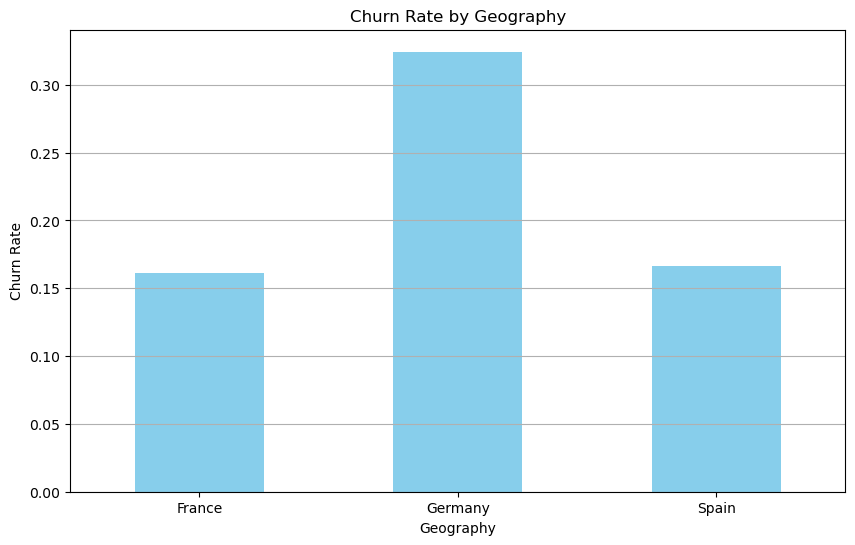

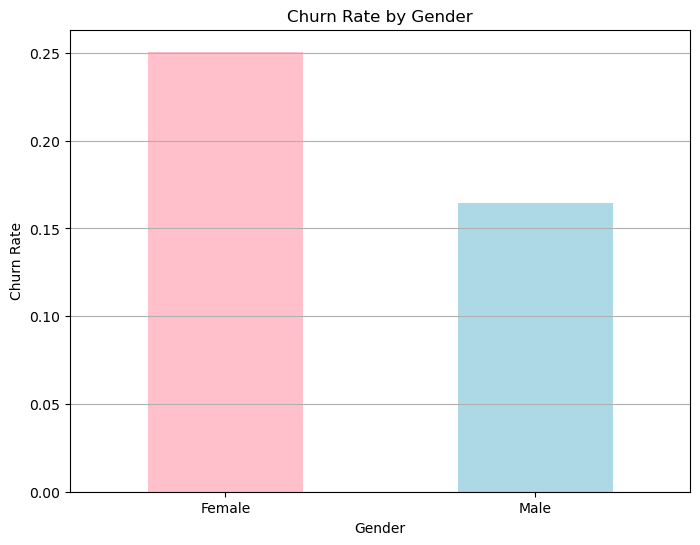

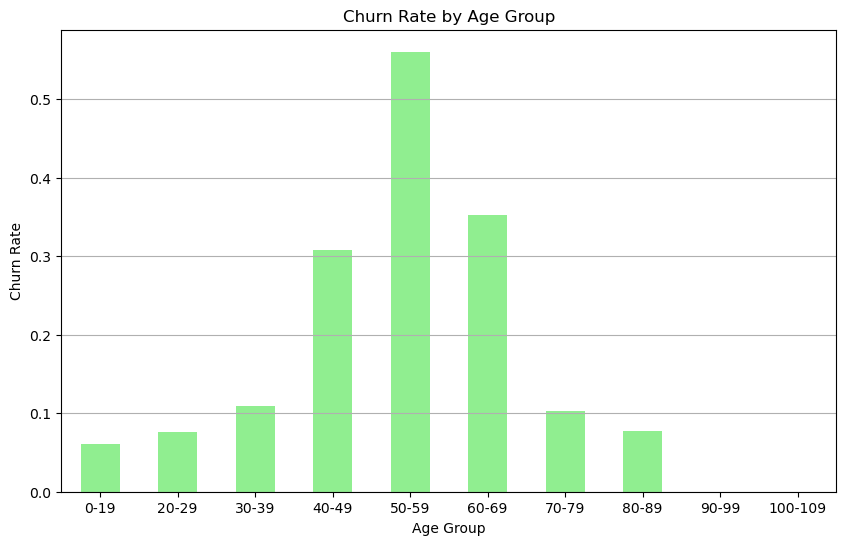

In [23]:
churn_by_geography = df.groupby('Geography')['churned'].mean()
churn_by_gender = df.groupby('Gender')['churned'].mean()
churn_by_age_group = df.groupby('AgeGroup')['churned'].mean()

print(churn_by_geography)
print(churn_by_geography)
print(churn_by_age_group)

plt.figure(figsize=(10, 6))
churn_by_geography.plot(kind='bar', color='skyblue')
plt.title('Churn Rate by Geography')
plt.xlabel('Geography')
plt.ylabel('Churn Rate')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

plt.figure(figsize=(8, 6))
churn_by_gender.plot(kind='bar', color=['pink', 'lightblue'])
plt.title('Churn Rate by Gender')
plt.xlabel('Gender')
plt.ylabel('Churn Rate')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

plt.figure(figsize=(10, 6))
churn_by_age_group.plot(kind='bar', color='lightgreen')
plt.title('Churn Rate by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Churn Rate')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()
# More ways we could solve this problem is by:
# Machine learning models to determine feature importance in predicting churn
#customer feedback and root cause analysis

#### We can see that one of the main reason for customers churning is reaching middle age. They have lost the interest in company and it's services the most.
 

###  Similarly the above data plotted shows the trends and patterns among the people who have churned.

# Product Usage

### What are the most commonly used products or services.

In [ ]:
# In the data provided i don't see a typical product or services for me to formulate
# the data to find the most commonly used product or services.

In [25]:
product_usage_counts = df['NumOfProducts'].value_counts()

print(product_usage_counts)

NumOfProducts
1    5084
2    4590
3     266
4      60
Name: count, dtype: int64


##### This shows the no. of products used by total no. of persons so total people using single product is 5084 and so on

### Analysing the usage pattern for customers with different segments.

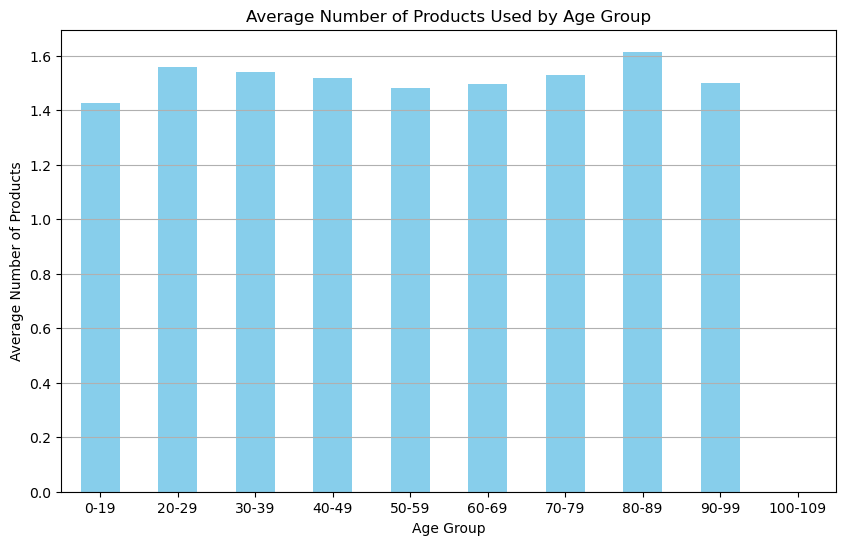

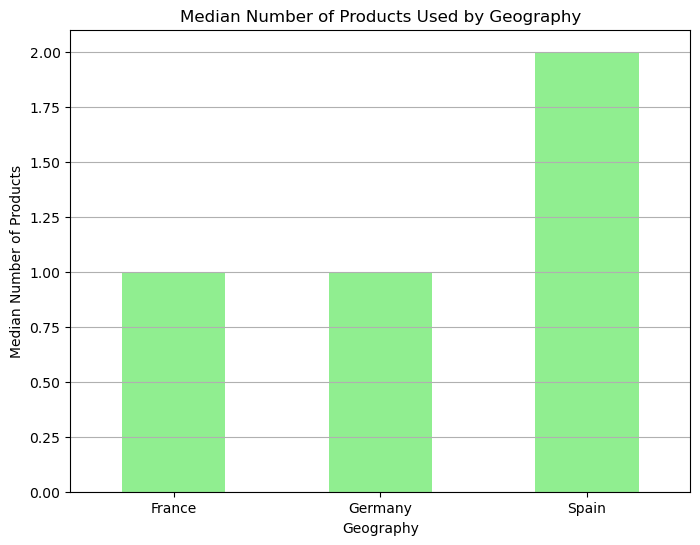

In [27]:
usage_by_age_group = df.groupby('AgeGroup', observed=False)['NumOfProducts'].mean()

plt.figure(figsize=(10, 6))
usage_by_age_group.plot(kind='bar', color='skyblue')
plt.title('Average Number of Products Used by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average Number of Products')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

usage_by_geography = df.groupby('Geography')['NumOfProducts'].median()

plt.figure(figsize=(8, 6))
usage_by_geography.plot(kind='bar', color='lightgreen')
plt.title('Median Number of Products Used by Geography')
plt.xlabel('Geography')
plt.ylabel('Median Number of Products')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

## Financial Anlysis

### What is the average account balance of customers.

In [31]:
average_balance = df['Balance'].mean()

print(f"The average account balance of customers is: {average_balance: .2f}")

# or a brute force way would be
#for index, row in df.iterrows():
    # Update the 'Balance' column in each row by adding to Total
#    row['Balance'] += Total
    # Accumulate the total sum of 'Balance'
#    Total += row['Balance']

The average account balance of customers is:  76485.89


### Comparing the financial characterstics of churned and non-churned customers.

In [39]:
summary_stats = df.groupby('churned').agg({
    'CreditScore': 'mean',
    'Balance': 'mean',
    'NumOfProducts': 'mean',
    'EstimatedSalary': 'mean'
}).reset_index()

summary_stats

,churned,CreditScore,Balance,NumOfProducts,EstimatedSalary
0,0,651.853196,72745.296779,1.544267,99738.391772
1,1,645.351497,91108.539337,1.475209,101465.677531


# Predictive Modelling

### Which factors are the most significant predictors of customer churn.

In [46]:
import numpy as np

numeric_columns = df.select_dtypes(include=[np.number]).columns

# Calculate correlation matrix
correlation_matrix = df[numeric_columns].corr()
churn_correlations = correlation_matrix['churned'].sort_values(ascending=False)
churn_correlations

# we can see age has to do the most with customer churning.

churned            1.000000
Age                0.285323
Balance            0.118533
EstimatedSalary    0.012097
CustomerId        -0.006248
HasCrCard         -0.007138
Tenure            -0.014001
RowNumber         -0.016571
CreditScore       -0.027094
NumOfProducts     -0.047820
IsActiveMember    -0.156128
Name: churned, dtype: float64

### Developing a predictive model to identify at risk customers

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Assuming X contains your features and y contains your target variable 'churned'
X = df.drop('churned', axis=1)  # Assuming 'churned' is the target variable
y = df['churned']
# Step 1: Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Select numeric features and create X_train_numeric
numeric_features = X_train.select_dtypes(include=['int64', 'float64']).columns
X_train_numeric = X_train[numeric_features]

# Step 3: Initialize RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42)

# Step 4: Fit the model on numeric data
rf_model.fit(X_train_numeric, y_train)

# Step 5: Prepare test data (assuming X_test is already prepared similarly)
X_test_numeric = X_test[numeric_features]

# Step 6: Make predictions on test data
y_pred = rf_model.predict(X_test_numeric)

# Step 7: Evaluate model performance
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.75      0.45      0.56       393

    accuracy                           0.86      2000
   macro avg       0.81      0.71      0.74      2000
weighted avg       0.85      0.86      0.85      2000

